In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import pickle, os, sys

In [3]:
# !aws s3 ls s3://sg-playground-kkoyama-temp/tcrpred/hhyylog/ | grep 20220211_191954

In [4]:
def get_df(datapath):
    return pd.DataFrame(pickle.load(open(datapath, "rb")))

def get_df_from_path(p_list):
    return pd.concat([get_df(d) for d in p_list]).reset_index(drop=True)



# Benchmark data

In [ ]:
train_df = 

In [ ]:
train_df['tcra:tcrb'] = train_df['tcra'] + ":" + train_df['tcrb']
valid_df['tcra:tcrb'] = valid_df['tcra'] + ":" + valid_df['tcrb']

# Files

In [4]:
plist = ['s3://sg-playground-kkoyama-temp/tcrpred/hhyylog/20220211_191954_k3_datasettest.pickle',
 's3://sg-playground-kkoyama-temp/tcrpred/hhyylog/20220211_191954_k3_test_hh.pickle',
 's3://sg-playground-kkoyama-temp/tcrpred/hhyylog/20220211_191954_k3_test_yy.pickle']

plist = [p.replace("s3://sg-playground-kkoyama-temp/tcrpred/", "s3://tcrpred/tcrpred/") for p in plist]

In [5]:
# s3://tcrpred/tcrpred/

In [6]:
!aws s3 ls s3://sg-playground-kkoyama-temp/tcrpred/hhyylog/ | grep 20220211 | grep datasettest


An error occurred (NoSuchBucket) when calling the ListObjectsV2 operation: The specified bucket does not exist


In [7]:
import sys
sys.path.append('../recipes/')
sys.path.append('../scripts/')
from dataset import MCPASDataset
from dataset_selector import dataset_select


In [8]:
KFOLDNUM = 3

# ret = dataset_select('all',kfold=3)

df_all,  dataset_train, dataset_valid, dataset_test, n_tok, n_pos1, n_pos2, n_seg = \
    dataset_select('all', kfold=KFOLDNUM)


../recipes/dataset.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['sign'].astype(int)
../recipes/dataset.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['sign'].astype(int)


datasize and y-vcounts:  (140082, 11) 0    116757
1     23325
Name: sign, dtype: int64
datasize and y-vcounts:  (35129, 11) 0    29331
1     5798
Name: sign, dtype: int64
datasize and y-vcounts:  (175211, 11) 0    146088
1     29123
Name: sign, dtype: int64


../recipes/dataset.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['sign'].astype(int)


In [9]:
len(dataset_train), len(dataset_valid), len(dataset_test)

(140082, 35129, 175211)

In [10]:
p_list = [
    "../external_data/ERGO-II/Samples/vdjdb_train_samples.pickle",
    "../external_data/ERGO-II/Samples/mcpas_train_samples.pickle",
    "../external_data/ERGO-II/Samples/vdjdb_test_samples.pickle",
    "../external_data/ERGO-II/Samples/mcpas_test_samples.pickle",
]

df_all = get_df_from_path(p_list)

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2)

train_index, valid_index = [
    (train_index, valid_index) for train_index, valid_index in kf.split(df_all)
][KFOLDNUM]

In [12]:
df_train, df_valid = df_all.loc[train_index], df_all.loc[valid_index]

In [13]:
df_train = df_train.query('tcra!="UNK"')
df_valid = df_valid.query('tcra!="UNK"')

In [14]:
df_valid.shape

(35129, 11)

# hhyy analysis

In [15]:
from scipy.special import softmax
from utils import get_infer_report, get_metrics

In [20]:
# !pip uninstall awscli s3fs boto3 -y

# !pip install boto3  --force-reinstall --upgrade

# !pip install awscli --force-reinstall --upgrade

# !pip install s3fs

In [17]:
!aws s3 ls s3://tcrpred/tcrpred/

                           PRE ERGO/
                           PRE checkpoint/
                           PRE external_data/
                           PRE hhyylog/
2023-05-02 06:39:22   36353783 01.05.VDJdb_only_grep.tsv
2023-05-02 06:39:57   59211517 01.VDJdb.tsv
2023-05-02 06:38:22    2365302 02.VDJdb.tsv
2023-05-02 06:38:21    1476352 03.VDJdb.tsv
2023-05-02 06:38:19     495356 03.VDJdb_noKLGGALQAK.tsv
2023-05-02 06:39:58   59576331 04.tape.pickle
2023-05-02 06:39:56   58359146 SearchTable-2021-04-18 18_47_15.405.tsv
2023-05-02 06:38:18      11945 TCRData.csv
2023-05-02 06:38:18      11945 TCRData_umd.csv
2023-05-02 06:41:05  102760448 all_structures.zip
2023-05-02 06:46:41     561421 dataset_test.csv
2023-05-02 06:46:46     745396 df_embedding_edit_distance_of_TCRs.parquet
2023-05-02 06:46:46     121473 distance_matrix.pickle
2023-05-02 06:53:49  387447564 edit_distance_of_TCRs.parquet
2023-05-02 06:50:10     191194 rcsb_pdb_20210501225436.fasta
2023-05-02 06:50:13     916460 rcs

In [18]:
plist[1]

's3://tcrpred/tcrpred/hhyylog/20220211_191954_k3_test_hh.pickle'

In [19]:
d20220211_191954_k3_test_hh = pd.read_pickle(plist[1]).apply(softmax, axis=1)
d20220211_191954_k3_test_yy = pd.read_pickle(plist[2])

In [21]:
isin_valid_index = dataset_test.data.apply(tuple,axis=1).isin(dataset_valid.data.apply(tuple,axis=1))
isin_valid_df = dataset_test.data.loc[isin_valid_index]
isin_valid_df.shape

(50379, 11)

In [22]:
isin_train_index = dataset_test.data.apply(tuple,axis=1).isin(dataset_train.data.apply(tuple,axis=1))
isin_train_df = dataset_test.data.loc[isin_train_index]
isin_train_df.shape

(149674, 11)

## Validation set

- acc 0.6756585085055281
- balanced_acc 0.7211840521829265
- precision on 1:  0.2547443068318018
- precision on 0:  0.9533190578158458
- confusion matrix tn, fp, fn, tp: 28938, 14923, 1417, 5101
- roc_auc_score 0.8175009851304436
- pr_auc_score on 1 0.46215746084731496
- pr_auc_score on 0 0.9666643011993737


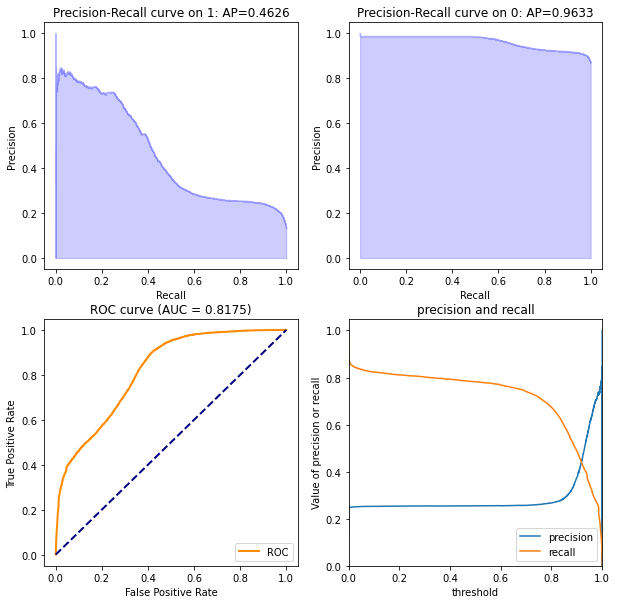

In [23]:
ypred = d20220211_191954_k3_test_hh.iloc[isin_valid_df.index][1]
ytrue = d20220211_191954_k3_test_yy.iloc[isin_valid_df.index].values
get_infer_report(ytrue, ypred)

In [25]:
d20220211_191954_k3_test_hh.head()

,0,1
0,1.000000,3.645487e-10
1,0.309951,6.900491e-01
2,1.000000,3.712091e-16
3,0.169171,8.308287e-01
4,0.110146,8.898538e-01


## Training set

- acc 0.7980744818739394
- balanced_acc 0.8799166742629394
- precision on 1:  0.438993593909572
- precision on 0:  0.9998956365647732
- confusion matrix tn, fp, fn, tp: 95809, 30213, 10, 23642
- roc_auc_score 0.9500170737317377
- pr_auc_score on 1 0.7837038633464529
- pr_auc_score on 0 0.9906427507737353


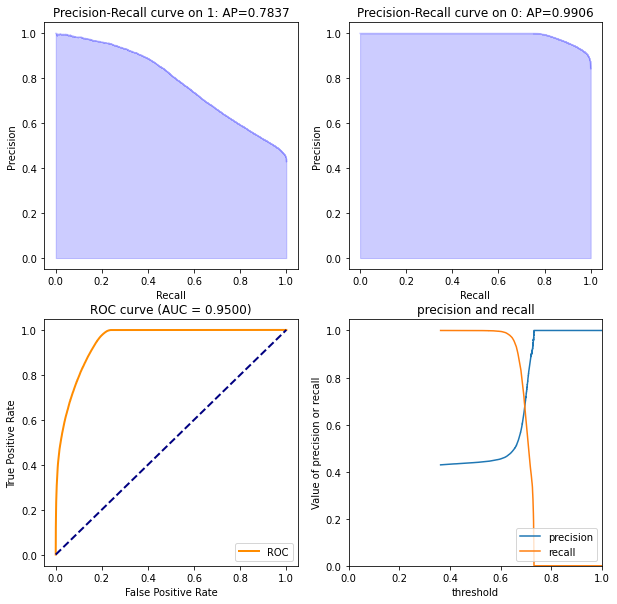

In [24]:
ypred = d20220211_191954_k3_test_hh.iloc[isin_train_df.index].apply(softmax, axis=1)[1]
ytrue = d20220211_191954_k3_test_yy.iloc[isin_train_df.index].values
get_infer_report(ytrue, ypred)

# PDB

In [5]:
directory = "../analysis/DICT_PDB_Result"
!ls {directory}

20220211_191954_DICT_PDBID_2_Atten12.pickle
20220211_191954_DICT_PDBID_2_CDRS.pickle
20220211_191954_DICT_PDBID_2_CHAINNAMES.pickle
20220211_191954_DICT_PDBID_2_DISTANCE.pickle
20220211_191954_DICT_PDBID_2_MELTDIST.pickle
20220211_191954_DICT_PDBID_2_RESIDUES.pickle
20220211_191954_DICT_PDBID_2_SEQUENCES_CDR.pickle
20220211_191954_DICT_PDBID_2_dfhhb.pickle
20220211_191954_DICT_PDBID_2_model_out.pickle


In [6]:
pickleload = lambda p: pickle.load(open(p,"rb"))
DICT_PDBID_2_SEQUENCES_CDR = pickleload(f"{directory}/20220211_191954_DICT_PDBID_2_SEQUENCES_CDR.pickle")

In [29]:
DICT_PDBID_2_model_out = pickleload(f'{directory}/20220211_191954_DICT_PDBID_2_model_out.pickle')
len(DICT_PDBID_2_model_out)

55

In [44]:
print("These are the deduped list of 55 structures:", ", ".join(DICT_PDBID_2_model_out.keys()))

These are the deduped list of 55 structures: 2VLK, 2ICW, 5WKF, 2VLJ, 3PQY, 4MJI, 4P2Q, 2YPL, 5BRZ, 6RPB, 1J8H, 4P2R, 5MEN, 3MV8, 4OZF, 3VXR, 3VXS, 4OZG, 3MV9, 5TEZ, 2J8U, 6Q3S, 4JRX, 5WLG, 3VXU, 1U3H, 4JRY, 4Z7V, 2UWE, 1LP9, 3W0W, 6AVF, 2BNQ, 4JFE, 4JFD, 3QIU, 6AVG, 2Z31, 2BNR, 5ISZ, 5KS9, 3MV7, 3MBE, 4OZH, 2NX5, 5NHT, 4QOK, 5D2L, 1D9K, 1FYT, 4P2O, 5WKH, 6EQB, 2VLR, 6EQA


In [42]:
df_DICT_PDBID_2_SEQUENCES_CDR = pd.DataFrame(DICT_PDBID_2_SEQUENCES_CDR).T
df_DICT_PDBID_2_SEQUENCES_CDR.columns = ['tcra','tcrb','peptide']
df_DICT_PDBID_2_SEQUENCES_CDR.drop_duplicates(subset=['tcra','tcrb','peptide'], inplace=True)
df_DICT_PDBID_2_SEQUENCES_CDR = df_DICT_PDBID_2_SEQUENCES_CDR.reset_index().rename(columns={'index':'pdbid'})
df_DICT_PDBID_2_SEQUENCES_CDR.shape

(49, 4)

In [31]:
df_DICT_PDBID_2_SEQUENCES_CDR.head(2)

,pdbid,tcra,tcrb,peptide
0,2VLK,CAGAGSQGNLIF,CASSSRSSYEQYF,GILGFVFTL
1,2ICW,CAVSGFASALTF,CASGGGGTLYF,PKYVKQNTLKLAT


In [33]:
dedup_seq_pdbids = df_DICT_PDBID_2_SEQUENCES_CDR[df_DICT_PDBID_2_SEQUENCES_CDR.pdbid.isin(DICT_PDBID_2_model_out.keys())]

In [36]:
print("These are the deduped list of 47 structures:", ", ".join(dedup_seq_pdbids.pdbid.unique()))

These are the deduped list of 47 structures: 2VLK, 2ICW, 5WKF, 3PQY, 4MJI, 4P2Q, 2YPL, 5BRZ, 6RPB, 1J8H, 4P2R, 5MEN, 3MV8, 4OZF, 3VXR, 3VXS, 4OZG, 5TEZ, 2J8U, 6Q3S, 4JRX, 5WLG, 3VXU, 1U3H, 4JRY, 4Z7V, 6AVF, 4JFE, 4JFD, 3QIU, 6AVG, 2Z31, 2BNR, 5ISZ, 5KS9, 3MBE, 4OZH, 2NX5, 5NHT, 4QOK, 5D2L, 1D9K, 4P2O, 5WKH, 6EQB, 2VLR, 6EQA


In [11]:
p_list = [
    "../external_data/ERGO-II/Samples/vdjdb_no10x_train_samples.pickle",
    "../external_data/ERGO-II/Samples/mcpas_train_samples.pickle",
    "../external_data/ERGO-II/Samples/vdjdb_no10x_test_samples.pickle",
    "../external_data/ERGO-II/Samples/mcpas_test_samples.pickle",
]


dfall = get_df_from_path(p_list)
merged_df = pd.merge(dfall,  
                     df_DICT_PDBID_2_SEQUENCES_CDR.reset_index(),  
                     on=['tcra','tcrb','peptide'],
                     how='inner')

In [12]:
merged_df = merged_df.rename(columns={'index':'pdbid'})
merged_df.shape

(70, 12)

In [17]:
DICT_PDBID_2_model_out = pickleload(f'{directory}/20220211_191954_DICT_PDBID_2_model_out.pickle')
len(DICT_PDBID_2_model_out)

55

In [14]:
merged_df['in_pdb'] = merged_df['pdbid'].isin(DICT_PDBID_2_model_out.keys()) #.drop_duplicates(subset=['tcra','tcrb','peptide'])

In [45]:
merged_df['in_pdb'].value_counts()

True    70
Name: in_pdb, dtype: int64

In [46]:
merged_df['pdbid'].nunique()

30

In [ ]:
pd.Series(DICT_PDBID_2_model_out.keys()).isin(merged_df.pdbid)

In [ ]:
for k in DICT_PDBID_2_model_out.keys():
    if k in merged_df.pdbid.tolist():
        print("    in", k, f'{DICT_PDBID_2_model_out[k][2]:.5f}')
    else:
        print("not in", k, f'{DICT_PDBID_2_model_out[k][2]:.5f}')